# 1. 데이터셋 얻기

> train에는 데이터가 label에는 결과 정보가 들어가 있다. 위와 같이 이미지와 label 정보를 확인할 수 있다.

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(60000, 28, 28)

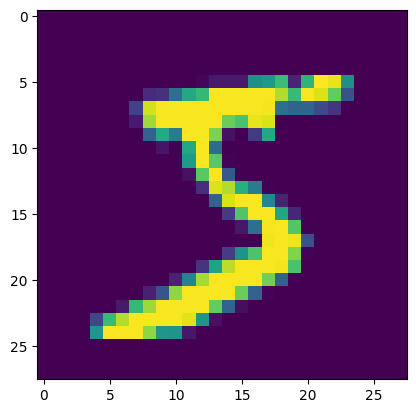

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [4]:
y_train[0]

5

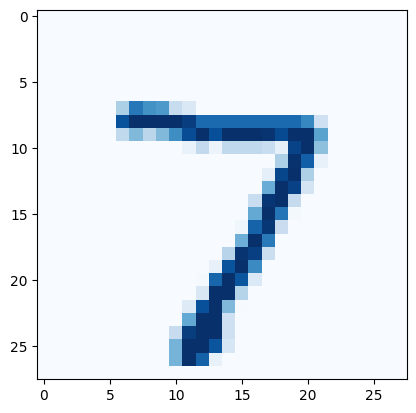

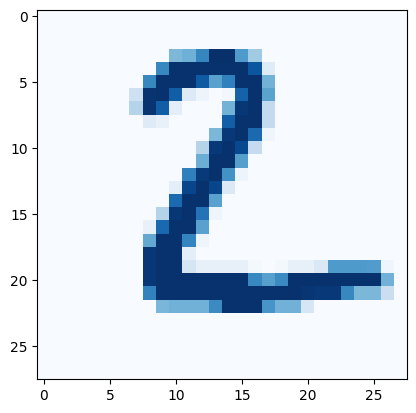

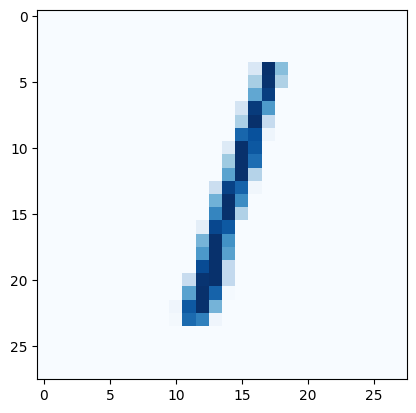

In [10]:
for i in range(3):
    # plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    
    plt.show()

# 2. 모델 만들기

## 2.1 모델 틀 생성

>모델을 생성하는데 Sequential()은 순차적으로 레이러를 추가할 수 있는 모델을 뜻한다.

In [12]:
from keras import models

model = models.Sequential()

## 2.2 layer 추가

In [13]:
from keras import layers, Input

input_shape = (28*28,)
model.add(Input(shape=input_shape))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

> input_shape는 입력 데이터를 뜻하는 것으로 (*, 28 * 28) 형식의 모든 데이터를 입력 받는 것이다.

> 512는 입력받은 데이터를 (*, 512) 형식으로 출력하는 결과이다.

> relu는 이미지 분석 시 기본적으로 사용되는 활성화 함수이다. 이 함수를 이용하면 0이하의 데이터는 0으로 나머지는 입력된 값으로 결과를 얻어 낼 수 있다. 또한 layer가 많은 경우 발생할 수 있는 gradient vanishing(기울기 사라짐) 문제를 해결할 수 있다.

> 두 번째 layers는 기존에 사용했던 input_shape이 유지 되며 softmax는 one-hot encoding을 적용하여 다양한 결과를 도출해 낼 수 있다. 여기서는 0~9까지 총 10개의 수를 분류해야 함으로 10을 사용하였다.

> softmax는 일반 벡터를 확률 벡터로 변환하는 것으로 주사위 1/6, 1/6 형식으로 표현하는 것과 같다. 이렇게 표현되면 1~6까지 6개의 데이터가 표현되는 것을 구현할 수 있는 것이다.

>https://keras.io/ko/layers/core/

## 2.3 컴파일

> 최적화는 rmsprop를 사용한다. 보편적으로 많이 사용되는 것은 atom이며 atom이전에 많이 사용되었던 최적화 도구이다. 두 부분을 변경하여 사용해 보자.

> 손실함수는 여러 결과를 얻어야 함으로 categorical_crossentropy를 사용했다. 

> 지표는 정확도를 사용했다.

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. 데이터 변환

> 일반적으로 이미지 데이터는 가로, 세로, 체널(색상정보)로 이루어진 3D 데이터이지만 본 데이터는 흑백사진으로 채널이 1인 데이터라 이를 제거하고 2D 형식으로 shape 정보를 가지고 있다.

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train_reshape = X_train.reshape((60000, 28*28))

In [18]:
X_train_reshape.max(), X_train_reshape.min()

(255, 0)

In [19]:
X_train_reshape = X_train_reshape.astype('float32') / 255

In [20]:
X_train_reshape.max(), X_train_reshape.min()

(1.0, 0.0)

> 원본 데이터는 0부터 255사이의 데이터이다. 수치를 실수화 처리하여 정확하고 빠른 확률 정보를 얻을 수 있다.

In [21]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [22]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_train_onehot[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# 4. 모델 학습 및 평가


## 4.1 모델 학습하기
> 에포크는 적당히 5로 지정했으며 batch_size도 적당히 128로 지정했다.

In [23]:
model.fit(X_train_reshape, y_train_onehot, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8760 - loss: 0.4318
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9663 - loss: 0.1161
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0727
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0509
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0386


## 4.2 평가하기

In [24]:
X_test_reshape = X_test.reshape((10000, 28*28))
X_test_reshape = X_test_reshape.astype('float32') / 255

y_test_onehot = to_categorical(y_test)

> 검증을 위해 test 데이터를 변환한다.

In [25]:
loss, acc = model.evaluate(X_test_reshape, y_test_onehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.9742 - loss: 0.0831


> 검증결과 손실함수는 0.06 정도로 나타나며 정확도는 0.98으로 나타난다.

# 5. 예측하기

In [26]:
import pandas as pd

pred = model.predict(X_test_reshape)
s = pd.Series(pred[0])
s.sort_values(ascending=False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step


7    9.999311e-01
3    6.508487e-05
2    3.388499e-06
9    2.483389e-07
8    7.713943e-08
0    7.246743e-08
5    2.077819e-08
1    7.946185e-09
4    1.773982e-11
6    1.181035e-12
dtype: float32

> ont-hot encoding으로 처리 했음으로 이중 가장 높은 활률의 데이터 위치가 실제 데이터가 된다. 즉, 7이 첫 번째 예측값의 결과인 것이다.

In [31]:
pred[0].argmin() + 1

7

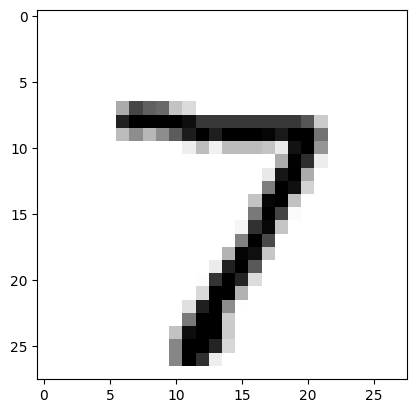

In [27]:
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

In [32]:
pred[1].argmin() + 1

5

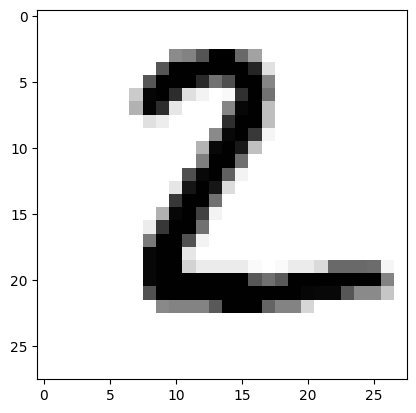

In [33]:
plt.imshow(X_test[1], cmap=plt.cm.binary)
plt.show()

> 실제값과 예측값을 비교해 보면 같이 나타난 것을 볼 수 있다.

# 6. 모델 저장하기

In [34]:
from keras.models import load_model
import os

model_path = 'model/'

if not os.path.exists(model_path):
    os.makedirs(model_path)
    
model.save(os.path.join(model_path, 'mnist240717.keras'))

In [35]:
new_model = load_model(os.path.join(model_path, 'mnist240717.keras'))

In [36]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)